In [7]:
import pandas as pd
google_stock_data = pd.read_csv("google-data.csv")

google_stock_data.head()


Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
1  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
2  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
3  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
4  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

    Volume  
0  5115500  
1  4666500  
2  5562800  
3  3332900  
4  3373900

In [9]:
google_stock_data.tail()


Date         Open         High          Low        Close  \
1254  2017-12-22  1061.109985  1064.199951  1059.439941  1060.119995   
1255  2017-12-26  1058.069946  1060.119995  1050.199951  1056.739990   
1256  2017-12-27  1057.390015  1058.369995  1048.050049  1049.369995   
1257  2017-12-28  1051.599976  1054.750000  1044.770020  1048.140015   
1258  2017-12-29  1046.719971  1049.699951  1044.900024  1046.400024   

        Adj Close   Volume  
1254  1060.119995   755100  
1255  1056.739990   760600  
1256  1049.369995  1271900  
1257  1048.140015   837100  
1258  1046.400024   887500

In [10]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = google_stock_data[['Date', 'Close']]
prophet_data = prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}) # DO NOT USE INPLACE EVER

# Create and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(prophet_data)

# Display the first few rows of the prepared data
prophet_data.head()

15:18:45 - cmdstanpy - INFO - Chain [1] start processing
15:18:48 - cmdstanpy - INFO - Chain [1] done processing


ds           y
0  2013-01-02  359.288177
1  2013-01-03  359.496826
2  2013-01-04  366.600616
3  2013-01-07  365.001007
4  2013-01-08  364.280701

In [ ]:
# pip install prophet

In [11]:
# Python
future = model.make_future_dataframe(periods=365*3)
future.head()

ds
0 2013-01-02
1 2013-01-03
2 2013-01-04
3 2013-01-07
4 2013-01-08

In [12]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()



ds        yhat  yhat_lower  yhat_upper
0 2013-01-02  373.416921  344.368409  405.572896
1 2013-01-03  372.127568  339.645829  401.948899
2 2013-01-04  372.051886  340.970750  402.257034
3 2013-01-07  370.390916  338.640309  400.426709
4 2013-01-08  370.493479  340.399906  400.303236

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2349 2020-12-24  1785.120252  1081.147108  2506.500273
2350 2020-12-25  1785.531880  1085.199249  2502.212853
2351 2020-12-26  1783.353580  1067.674474  2505.878566
2352 2020-12-27  1783.230335  1057.311014  2512.384780
2353 2020-12-28  1784.635377  1059.442745  2515.078602

C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Emil\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


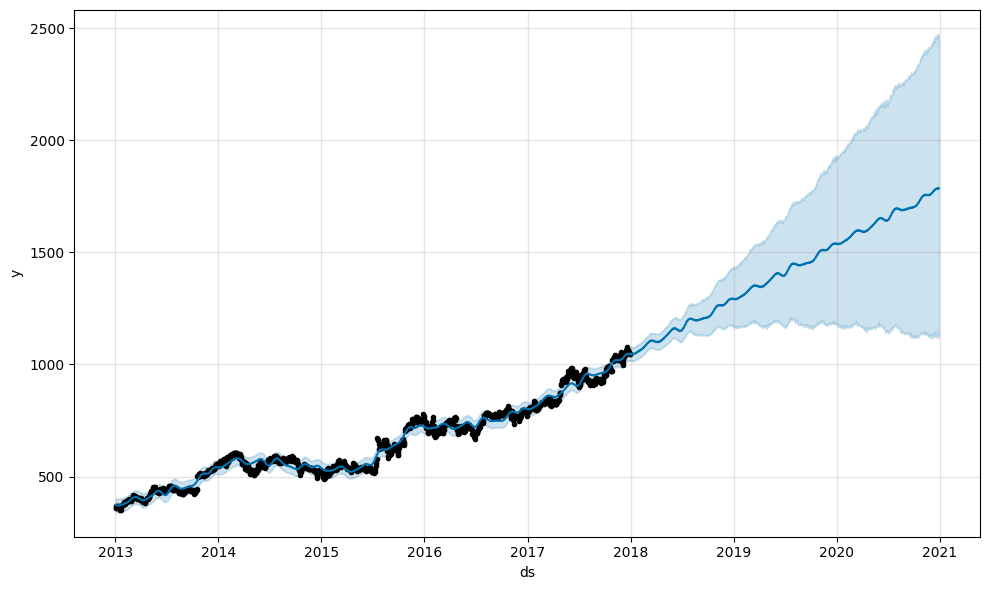

In [5]:
# Python
fig1 = model.plot(forecast)



In [23]:
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    y = trial.suggest_float('x', -10, 10)
    z = trial.suggest_float('x', -10, 10)
    return (x - y - z) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=10000)

study.best_params  # E.g. {'x': 2.002108042}

[I 2023-12-27 15:45:19,763] A new study created in memory with name: no-name-2d0c7b41-9ddb-48f2-a574-5977db60ad3f
[I 2023-12-27 15:45:19,766] Trial 0 finished with value: 54.638443478515235 and parameters: {'x': 7.391782158486222}. Best is trial 0 with value: 54.638443478515235.
[I 2023-12-27 15:45:19,768] Trial 1 finished with value: 19.080449423380376 and parameters: {'x': -4.36811737747286}. Best is trial 1 with value: 19.080449423380376.
[I 2023-12-27 15:45:19,770] Trial 2 finished with value: 20.514278434579737 and parameters: {'x': 4.529269083922895}. Best is trial 1 with value: 19.080449423380376.
[I 2023-12-27 15:45:19,775] Trial 3 finished with value: 18.160099604855823 and parameters: {'x': 4.261466837235252}. Best is trial 3 with value: 18.160099604855823.
[I 2023-12-27 15:45:19,777] Trial 4 finished with value: 0.11951700253315979 and parameters: {'x': 0.34571231180442474}. Best is trial 4 with value: 0.11951700253315979.
[I 2023-12-27 15:45:19,781] Trial 5 finished with va

In [18]:
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd

log_params = [1, 0.1, 0.001, 0.001, 0.0001, 0.00001]

# Objective function to be optimized
def objective(trial):
    # Define the hyperparameters to be optimized
    param = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 0.5),
        'seasonality_prior_scale': trial.suggest_float('seasonality_prior_scale', 0.01, 10),
        'seasonality_mode': trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
        
    }

    # Create a Prophet model with the suggested parameters
    model = Prophet(**param)
    model.fit(prophet_data)

    # Perform cross-validation
    df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    # Extract and return the mean absolute error (MAE)
    mae = df_p['mae'].mean()
    return mae

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Best parameters
print('Best parameters:', study.best_params)


[I 2023-12-27 15:37:58,495] A new study created in memory with name: no-name-f251b56a-d79e-4fb0-83a9-5e7d249fdb6b
15:37:58 - cmdstanpy - INFO - Chain [1] start processing
15:38:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|                                                                                            | 0/5 [00:00<?, ?it/s]15:38:01 - cmdstanpy - INFO - Chain [1] start processing
15:38:03 - cmdstanpy - INFO - Chain [1] done processing
 20%|████████████████▊                                                                   | 1/5 [00:02<00:08,  2.02s/it]15:38:03 - cmdstanpy - INFO - Chain [1] start processing
15:38:06 - cmdstanpy - INFO - Chain [1] done processing
 40%|█████████████████████████████████▌                                                  | 2/5 [00:05<00:07,  2.65s/it]15:38:06 - cmdstanpy - INFO - Chain [1] start processing
15:38:08 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████████████████████████████████████████████████▍                     

Best parameters: {'changepoint_prior_scale': 0.18977939375025363, 'seasonality_prior_scale': 4.109199147204875, 'seasonality_mode': 'multiplicative'}
